In [ ]:
%load_ext rpy2

In [ ]:
%rpy2

# Funnel Analysis 

## Overview
We don't have real longitudinal data, but we have a way of creating a proxy for the same sort of insight. There are questions related to: 
* longevity: how long been using mobile money
* frequency: how often uses mobile money
* recency: how recently used mobile money

Intuitively, we can imagine cases where individuals learned about mobile money a long time ago (exposure), signed up (enrollment), used the services regularly (engagement) and continue to do so (retention).

In this funnel analysis, we see these as progressive steps (e.g.. "out of those who have heard of mobile money, how many have an account?"... "Out of those that have a mobile money account, how many use mobile money services regularly"). We treat each step as a binary classification problem, and try to find those features and demographics that are predictive of progressing "to the next stage" of the funnel.

## Data Sources

The data source is the Financial Inclusion Insights Data (<a href="http://finclusion.org/about/">http://finclusion.org/about/</a>). 
 
  * We consider responses from Uganda, Kenya, and Tanzania, the countries of interest for this project
  * We consider only "wave 3" questions that relate to these concepts.
  * Wave 3 surveys were conducted in 2015

The source data is in Microsoft XLSX format. Preprocessing steps include format conversion from XLSX to CSV, merging columns for those survey responses that are identical across all countries, and renaming columns to a human readable format. For example: 

`'MM9' --> 'how_long_using_mobile_money'`


## Survey questions

We have selected Wave 3 questions that relate to the concepts of interest. We have also broken down survey responses to separate usage of mobile money into "basic" and more "sophisticated" categories, where the former ("basic services") is mostly transferring money, and the later ("sophisticated services") includes activities like long-term savings and insurance.

Concepts: 
 Exposure
 Enrollment
 Usage of basic financial services
 Usage of sophisticated financial services
 Recency
 Longevity
 Frequency
 (Retention)

Filters: 
  Downstream retention is specifically concerned with usage after the first 90 days of use. 

The specific questions and responses considered to address each of these concepts are detailed below in the corresponding sections. 

## Funnel Analysis

[Describe the funnel path and flow] 

[Describe what attributes of respondants are examined at each step] 

## Results and further information

[available in the project deliverable report] 


# --------------------

In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

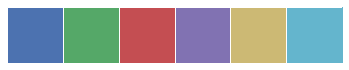

In [3]:
# Color palette (https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html) 
# -- qualitative
qual_palette = sns.color_palette()
sns.palplot(qual_palette)

# -- 

In [4]:
"""
## Load Data

 
"""
input_data_dir = 'Data/'
# os.listdir(input_data_dir)
df = pd.DataFrame.from_csv(
    os.path.join(input_data_dir, 'merged_fii_data_wave3_20160915.csv'),
)

In [5]:
df.head()

,country,year_of_birth,gender,marital_status,education_level,heard_of_mobile_money,biggest_challenge_with_mobile_money,reason_never_used_mobile_money,ever_used_mobile_money_for|deposit,ever_used_mobile_money_for|paygovt,...,last_time_financial_activity_using_account|serv2,last_time_financial_activity_using_account|serv3,last_time_financial_activity_using_account|serv4,last_time_financial_activity_using_account|serv5,last_time_financial_activity_using_account|serv6,last_time_financial_activity_using_account|serv7,last_time_financial_activity_using_account|serv8,last_time_financial_activity_using_account|serv9,how_long_using_mobile_money,source_filename
0,nigeria,1993.0,2,1,5,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fsp_final_nigeria_w3_(public).csv
1,nigeria,1989.0,1,5,5,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fsp_final_nigeria_w3_(public).csv
2,nigeria,1985.0,2,1,5,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fsp_final_nigeria_w3_(public).csv
3,nigeria,1995.0,1,1,5,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fsp_final_nigeria_w3_(public).csv
4,nigeria,1998.0,1,1,4,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fsp_final_nigeria_w3_(public).csv


In [6]:
print "total respondants by country"
n_records = dict()
for k,v in df.country.value_counts().iteritems():
    n_records[k] = float(v)  # make float for division norms later
print n_records

total respondants by country
{'kenya': 2994.0, 'nigeria': 6001.0, 'tanzania': 3001.0, 'uganda': 3000.0}


## Demographic information

### Age

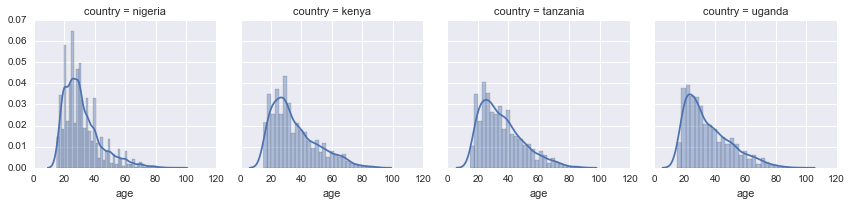

In [7]:
"""
age of respondants
DG1 : Year of birth UT
"""
# survey year is 2015
survey_year = 2015
df['age'] = survey_year - df.year_of_birth

# # plot for all ages
# ax = sns.distplot(df.age.dropna(), bins=30)
# ax.set_title('Age of all respondants')

# plot age by country
g = sns.FacetGrid(df, col="country")
g = g.map(sns.distplot, 'age', )

### Gender

In [8]:
"""
Gender
DG2 : male/female (observed) UT
1 male
2 female
"""
col = 'gender'

dat = df[[col, 'country']].copy()

# convert gender to categorical
dat.loc[dat.gender==1, ['gender']] = 'male'
dat.loc[dat.gender==2, ['gender']] = 'female'

# plot for all ages
grp = dat.groupby(by='country')[col].value_counts()

# normalize
dat = grp\
    .unstack()\
    .apply(lambda x: [(count / n_records[country]) for country, count in x.iteritems()])

dat['total'] = dat['male'] + dat['female']
dat

# simpler?
#ax = sns.distplot(df.gender.dropna(), bins=30)
#ax.set_title('Age of all respondants')


gender,female,male,total
country,,,
kenya,0.611890,0.388110,1.0
nigeria,0.429262,0.570738,1.0
tanzania,0.507164,0.492836,1.0
uganda,0.651667,0.348333,1.0


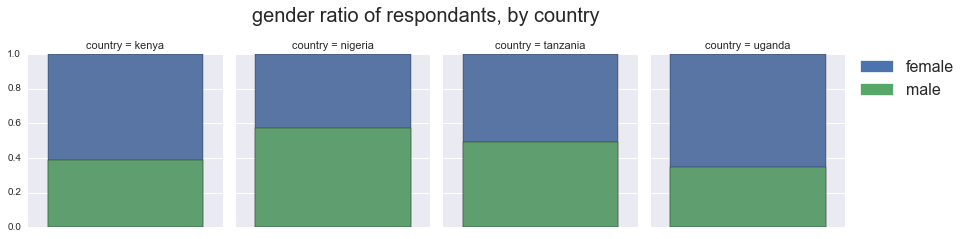

In [9]:
"""
plot age by country
"""
 
def plotfunction(data, color):
    ax = sns.barplot(y='male', data=data)
    ax.set(xlabel='common xlabel', ylabel='common ylabel')
    
g = sns.FacetGrid(dat.reset_index(), col="country")
color_one, color_two = qual_palette[0], qual_palette[1]
g.map_dataframe(lambda data, color: sns.barplot(y='total', data=data, color=color_one))
g.map_dataframe(lambda data, color: sns.barplot(y='male', data=data, color=color_two))

patch_one = mpatches.Patch(color=color_one, label='female')
patch_two = mpatches.Patch(color=color_two, label='male')

plt.legend(handles=[patch_one, patch_two], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size':16})

plt.suptitle('gender ratio of respondants, by country', fontsize=20, y=1.1)
plt.show()

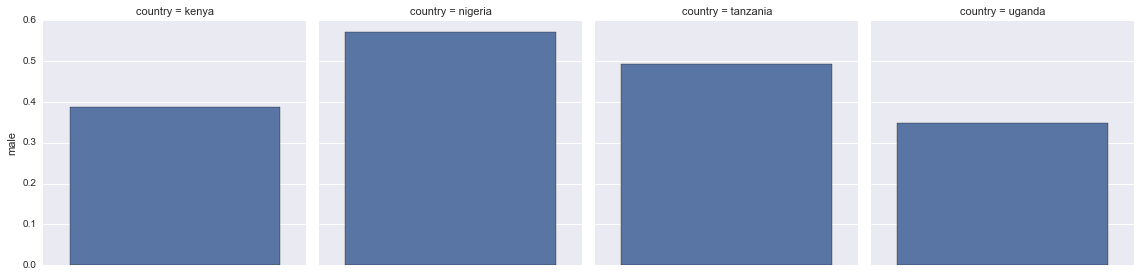

In [10]:
# plotting ratio by country
# use dat
sns.factorplot(data=dat.reset_index(), 
               col='country', 
               kind='bar', 
               y='male',  
               #set_ylim=(0,1), 
               #name='a'
              )

# plotting value by country
# use df
#sns.countplot(x='country', hue='gender', data=df)

### Level of Education 

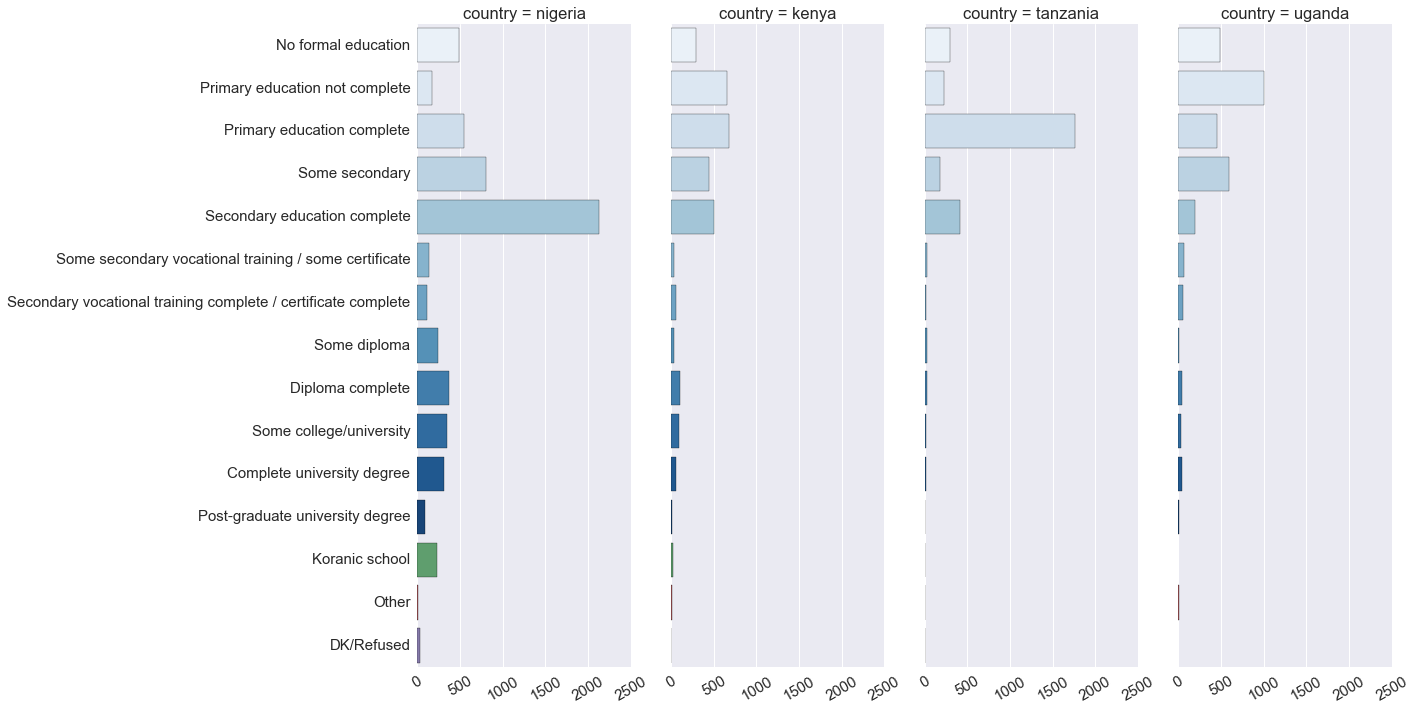

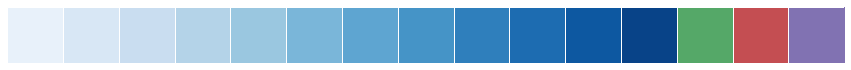

In [11]:
"""
Education level
----
DG4 : education level UT
1  No formal education
2  Primary education not complete
3  Primary education complete
4  Some secondary
5  Secondary education complete
6  Some secondary vocational training / some certificate
7  Secondary vocational training complete / certificate complete
8  Some diploma
9  Diploma complete
10 Some college/university
11 Complete university degree
12 Post-graduate university degree
13 Koranic school
14 Other
15 DK/Refused
"""

col = 'education_level'

# rename
dat = df[[col, 'country']].copy()
rename_map = {
    1: 'No formal education',
    2: 'Primary education not complete',
    3: 'Primary education complete',
    4: 'Some secondary',
    5: 'Secondary education complete',
    6: 'Some secondary vocational training / some certificate',
    7: 'Secondary vocational training complete / certificate complete',
    8: 'Some diploma',
    9: 'Diploma complete',
    10: 'Some college/university',
    11: 'Complete university degree',
    12: 'Post-graduate university degree',
    13: 'Koranic school',
    14: 'Other',
    15: 'DK/Refused',
    }
dat['education'] = dat[col].apply(lambda x: rename_map[x])

# counts
#dat[col].value_counts()

# aesthetics
sns.set(font_scale=1.5)
color_palette = sns.color_palette("Blues", 12)
color_palette = color_palette + qual_palette[1:4]

def funcplot(data, color):
    sns.countplot(data=data, y='education', 
                  order=rename_map.viewvalues(),  # maintain provided order
                  palette=color_palette,
                 )

# plotting value by country
g = sns.FacetGrid(data=dat, col="country", 
                  size=10, aspect=0.5,
                 )
#g.map(sns.countplot, 'education')
p = g.map_dataframe(funcplot)
g.set_xticklabels(rotation=30)

sns.palplot(color_palette)
plt.show()

### Marital Status

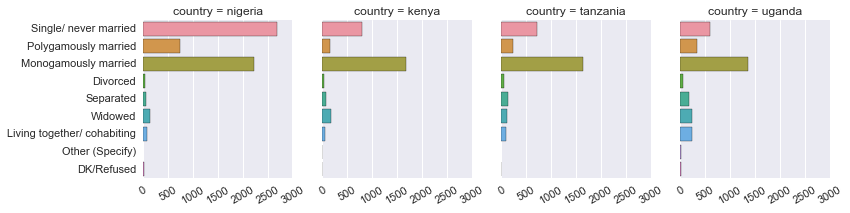

In [12]:
"""
Marital Status

DG3 : marital status UT
1  Single/ never married
2  Polygamously married
3  Monogamously married
4  Divorced
5  Separated
6  Widowed
7  Living together/ cohabiting
8  Other (Specify)
9  DK/Refused

"""


col = 'marital_status'
sns.set(font_scale=1.1)

# rename
dat = df[[col, 'country']].copy()
rename_map = {
    1: 'Single/ never married',
    2: 'Polygamously married',
    3: 'Monogamously married',
    4: 'Divorced',
    5: 'Separated',
    6: 'Widowed',
    7: 'Living together/ cohabiting',
    8: 'Other (Specify)',
    9: 'DK/Refused',
    }
dat[col] = dat[col].apply(lambda x: rename_map[x])

def funcplot(data, color):
    sns.countplot(data=data, y=col, order=rename_map.viewvalues())

# plotting value by country
g = sns.FacetGrid(data=dat, col="country")
p = g.map_dataframe(funcplot)
g.set_xticklabels(rotation=30)
p

In [13]:
"""
Missing: Employment status
Wealth measures? 

See Section II of Manuscript. 
"""
pass

# Funnel Steps

 * Define target labels for each step
 * input labels needed as well? 

## Funnel step: Exposure

Population: 

 * All respondants are part of the population 

Survey Questions: 

 * MM1. Have you ever heard of something called Mobile Money? 

```
'MM1'  : 'heard_of_mobile_money',
1 Yes
2 No
```

In [14]:
col = 'heard_of_mobile_money'
dat = df[[col, 'country']]  # is a view
dat.head()

,heard_of_mobile_money,country
0,2,nigeria
1,2,nigeria
2,1,nigeria
3,2,nigeria
4,2,nigeria


In [15]:
# rename answers
rename_map = {
    1: True, # 'yes'
    2: False, # 'no',
    }
# create exposure funnel step
df['funnel|exposure'] = dat[col].apply(lambda x: rename_map[x])

## Funnel step: Enrollment

Population: 

 1. Exposure:True

Survey Questions: 

 * MM4. Have you ever used this mobile money service for any financial activity?
 * MM6_n Do you have a registered account (account registered in your name) with [any] mobile money service?
 * no answer for MM12 What is the main reason you have never used mobile money services?

```
'MM4_1'  : 'ever_used_any_mobile_money_service|serv1',
'MM4_2'  : 'ever_used_any_mobile_money_service|serv2',
..'MM4_14'

'MM6_1'  : 'have_account_with_any_mobile_money_service|serv1',
'MM6_2'  : 'have_account_with_any_mobile_money_service|serv2',
..'MM6_14'

serv1-n: various MN Provider Services, different by country
eg. 
    serv1: Vodacom M-PESA
    serv2: Tigo Pesa
    serv3: Airtel Money
    etc    
```

In [39]:
tt = df[mm4_cols]

In [47]:
np.any(ss.dropna().values == 1)

False

In [48]:
df[mm4_cols].head().apply(lambda ss: np.any(ss.dropna().values==1), axis=1)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [53]:
# create MM4 "Any" column
# respondants that have used _any_ MM services

mm4_cols = [c for c in df.columns if c.startswith('ever_used_any_mobile_money_service|serv')]
df['mm4_any'] = df[mm4_cols].apply(lambda ss: np.any(ss.dropna().values==1), axis=1)

# create MM6 "Any" column
# respondants that have account with any provider

mm6_cols = [c for c in df.columns if c.startswith('have_account_with_any_mobile_money_service|serv')]
df['mm6_any'] = df[mm6_cols].apply(lambda ss: np.any(ss.dropna().values==1), axis=1)

# create new funnel column
df['funnel|enrollment'] = df['mm4_any'] & df['mm6_any']

In [64]:
# sanity checks

# inspect mm4 op
# df[mm4_cols + ['mm4_any']+['reason_never_used_mobile_money']].head(20).T

keep_cols = ['funnel|exposure', 'funnel|enrollment', 'mm4_any', 'mm6_any', 'reason_never_used_mobile_money']
dat = df[keep_cols]

print "(ever used any service) and  NOT (have any account)"
print "Ideally, should be zero?"
print "{:<10}: {}".format("XOR", (dat['mm6_any'] & ~dat['mm4_any']).sum())
print "bonus"
print "{:<10}: {}".format("XOR", (dat['mm4_any'] & ~dat['mm6_any']).sum())

print 
print "MM12: reason_never_used_mobile_money"
print "Ideally, should be zero"
mask = ~dat['reason_never_used_mobile_money'].isnull()
print "{:<10}: {}".format("AND", (mask & dat['funnel|enrollment']).sum())

(ever used any service) and  NOT (have any account)
Ideally, should be zero
XOR       : 167
bonus
XOR       : 894

MM12: reason_never_used_mobile_money
Ideally, should be zero
AND       : 0


In [59]:
dat[mask].head(15).T

,2,5,13,14,26,31,34,43,44,45,68,94,95,97,103
funnel|exposure,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
funnel|enrollment,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
mm4_any,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
mm6_any,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
reason_never_used_mobile_money,1,1,14,1,1,1,1,19,2,1,2,2,2,1,15


## Funnel step: Usage - Basic Services

Population: 

 1. Exposure:True & Enrollment:True

Survey Questions: 

 * MM15. Have you ever used a mobile money account to do [any of] the following [basic services]?
        [1-2] deposit, withdraw
        [3-10] pay bills
        [11 - 12] Send, Receive money

```
basic
'MM15_1' : 'ever_used_mobile_money_for|deposit',
'MM15_2' : 'ever_used_mobile_money_for|withdraw',
'MM15_3' : 'ever_used_mobile_money_for|paymobilebill',
'MM15_4' : 'ever_used_mobile_money_for|payschoolfee',
'MM15_5' : 'ever_used_mobile_money_for|paymedical',
'MM15_6' : 'ever_used_mobile_money_for|payelectrical',
'MM15_7' : 'ever_used_mobile_money_for|paywater',
'MM15_8' : 'ever_used_mobile_money_for|paysolar',
'MM15_9' : 'ever_used_mobile_money_for|paytv',
'MM15_10' : 'ever_used_mobile_money_for|paygovt',
'MM15_11' : 'ever_used_mobile_money_for|sendmoneyindiv',
'MM15_12' : 'ever_used_mobile_money_for|getmoneyindiv',
```

In [81]:
# create MM15 Basic Usage 
# respondants that have used MM basic usage services

mm15_cols = [c for c in df.columns if c.startswith('ever_used_mobile_money_for|')]

basic_keywords = [
    '|withdraw', '|paymobilebill', '|payschoolfee', '|paymedical',
    '|payelectrical', '|paywater', '|paysolar', '|paytv',
    '|paygovt', '|sendmoneyindiv', '|getmoneyindiv',
]
mm15_basic_cols = [c for c in mm15_cols if 
                   any([kw in c for kw in basic_keywords])]


df['funnel|usage_basic'] = df[mm15_basic_cols].apply(lambda ss: np.any(ss.dropna().values==1), axis=1)

In [82]:
# sanity checks

keep_cols = ['funnel|exposure', 'funnel|enrollment', 'funnel|usage_basic'] + mm15_basic_cols
mask = df['funnel|usage_basic'].copy()
mask[:5] = True  # also just grab the first five records
df.ix[mask, keep_cols].head(10).T


,0,1,2,3,4,145,324,499,503,818
funnel|exposure,False,False,True,False,False,True,True,True,True,True
funnel|enrollment,False,False,False,False,False,True,True,True,True,True
funnel|usage_basic,False,False,False,False,False,True,True,True,True,True
ever_used_mobile_money_for|paygovt,NaN,NaN,NaN,NaN,NaN,2,2,1,2,2
ever_used_mobile_money_for|sendmoneyindiv,NaN,NaN,NaN,NaN,NaN,2,1,2,2,1
ever_used_mobile_money_for|getmoneyindiv,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
ever_used_mobile_money_for|withdraw,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
ever_used_mobile_money_for|paymobilebill,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
ever_used_mobile_money_for|payschoolfee,NaN,NaN,NaN,NaN,NaN,2,2,2,2,1
ever_used_mobile_money_for|paymedical,NaN,NaN,NaN,NaN,NaN,2,2,2,2,1


## Funnel step: Usage - Sophisticated Services

Population: 

 1. Exposure:True & Enrollment:True

Survey Questions: 

 * MM15. Have you ever used a mobile money account to do [any of] the following [basic services]?
        
```
'MM15_13' : 'ever_used_mobile_money_for|getmoneygovt',
'MM15_14' : 'ever_used_mobile_money_for|getwages',
'MM15_15' : 'ever_used_mobile_money_for|paylarge',
'MM15_16' : 'ever_used_mobile_money_for|payinsurance',
'MM15_17' : 'ever_used_mobile_money_for|payloan',
'MM15_18' : 'ever_used_mobile_money_for|savemoney',
'MM15_19' : 'ever_used_mobile_money_for|setasidepension',
'MM15_20' : 'ever_used_mobile_money_for|setasideother',
'MM15_21' : 'ever_used_mobile_money_for|makeinvestment',
'MM15_22' : 'ever_used_mobile_money_for|payatstore',
'MM15_23' : 'ever_used_mobile_money_for|transfermobile',
'MM15_24' : 'ever_used_mobile_money_for|transferbank',
'MM15_25' : 'ever_used_mobile_money_for|transfermobiletoother',
'MM15_26' : 'ever_used_mobile_money_for|lendinggroup',
'MM15_27' : 'ever_used_mobile_money_for|payrent',
'MM15_28' : 'ever_used_mobile_money_for|accountmaint',
'MM15_29' : 'ever_used_mobile_money_for|other',
```

In [84]:
# create MM15 sophisticated Usage 
# respondants that have used MM basic usage services

mm15_cols = [c for c in df.columns if c.startswith('ever_used_mobile_money_for|')]

sophisticated_keywords = [
    '|getmoneygovt','|getwages', '|paylarge',
    '|payinsurance', '|payloan', '|savemoney',
    '|setasidepension', '|setasideother', '|makeinvestment',
    '|payatstore', '|transfermobile', '|transferbank', 
    '|transfermobiletoother', '|lendinggroup', '|payrent',
    '|accountmaint',
]
mm15_sophisticated_cols = [c for c in mm15_cols if 
                   any([kw in c for kw in sophisticated_keywords])]


df['funnel|usage_sophisticated'] = df[mm15_sophisticated_cols].apply(
    lambda ss: np.any(ss.dropna().values==1), axis=1)

In [89]:
# sanity checks

keep_cols = ['funnel|exposure', 'funnel|enrollment', 'funnel|usage_basic' ,'funnel|usage_sophisticated'] +\
    mm15_basic_cols + mm15_sophisticated_cols
mask = (df['funnel|usage_basic'] | df['funnel|usage_sophisticated']).copy()
mask[:3] = True  # also just grab the first five records
df.ix[mask, keep_cols].head(10).T


,0,1,2,145,324,499,503,818,855,1133
funnel|exposure,False,False,True,True,True,True,True,True,True,True
funnel|enrollment,False,False,False,True,True,True,True,True,True,True
funnel|usage_basic,False,False,False,True,True,True,True,True,True,True
funnel|usage_sophisticated,False,False,False,False,False,False,False,True,False,False
ever_used_mobile_money_for|paygovt,NaN,NaN,NaN,2,2,1,2,2,2,2
ever_used_mobile_money_for|sendmoneyindiv,NaN,NaN,NaN,2,1,2,2,1,2,2
ever_used_mobile_money_for|getmoneyindiv,NaN,NaN,NaN,2,2,2,2,2,2,2
ever_used_mobile_money_for|withdraw,NaN,NaN,NaN,1,1,1,1,1,2,2
ever_used_mobile_money_for|paymobilebill,NaN,NaN,NaN,1,1,1,1,1,2,1
ever_used_mobile_money_for|payschoolfee,NaN,NaN,NaN,2,2,2,2,1,2,2


# Example

## Examine funnel step

In [ ]:
df.head()

In [ ]:
col = 'exposure'
dat = df[[col, 'country']]

def funcplot(data, color):
    sns.countplot(data=data, y=col)

# plotting value by country
sns.set(font_scale=1)
g = sns.FacetGrid(data=dat, col="country")
p = g.map_dataframe(funcplot)
g.set_xticklabels(rotation=30)
p

In [ ]:
# overall breakdown
df[col].value_counts()

In [ ]:
grp = df.groupby(by='country')[col].value_counts()

# normalize
dat = grp\
    .unstack()\
    .apply(lambda x: [(count / n_records[country]) for country, count in x.iteritems()])

# answers
#dat.columns = ['% yes', '% no']
dat

In [ ]:
df.columns

In [ ]:
"""
Prepare Funnel Step Data Export to CSV

"""
# choose columns for X (features)
X_columns = ['country', 'age', 'gender', 'marital_status', 'education_level', ]

# columns for target label(s)
y_column = [col]


outfilename = 'Data/derived_data/funnel_step_exposure.csv'
df[X_columns+y_column].to_csv(outfilename)

print "writing to file: {}".format(outfilename)


In [ ]:
!head $outfilename

## Preprocess Features

### Prepare X / feature matrix

```
The columns we care about are: 
    ['country', 'age', 'gender', 'marital_status', 'education_level', ]

We treat the following as real-valued: 
    age
    
We treat the following as binary:
    gender

We treat the following as nominal (order matters):
    Education level [no; see below]

We treat the following as categorical (order doesn't matter)
    Education level [we can't use as nominal because of "Koranic", "other", "refused"]? 
    Marital status
    Country
    
```


In [ ]:
"""
Prepare X / feature matrix
"""

# choose columns for X (features)
X_columns = ['country', 'age', 'gender', 'marital_status', 'education_level', ]

# features
feature_labels = []
X_array = []

# Preprocessing on X


# Gender doesn't need encoding
encoded = df['gender'].values

encoded_feature_labels = ['gender']
feature_labels += encoded_feature_labels
X_array.append(encoded)

# One Hot encoding
# for certain features
one_hot_features = ['country', 'marital_status', 'education_level']
cme_df = df[one_hot_features].copy()

# country values are string type, must first be integer type
country_enc_1 = LabelEncoder()
cme_df['country'] = country_enc_1.fit_transform(cme_df['country'])

# encode
cme_enc = OneHotEncoder()

n_values=[len(df[c].unique()) for c in one_hot_features]
encoded = cme_enc.fit_transform(cme_df.values)
encoded_feature_labels = \
    ['country_{}'.format(ii) for ii in range(n_values[0])]+\
    ['marital_{}'.format(ii) for ii in range(n_values[1])]+\
    ['education_{}'.format(ii) for ii in range(n_values[2])]
feature_labels += encoded_feature_labels
X_array.append(encoded)


In [ ]:
# merge feature arrays
X = np.hstack([
    np.atleast_2d(X_array[0]).T,
    X_array[1].todense()
])
X = csr_matrix(X)

### modeling

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np

# sparse
from scipy.sparse import csr_matrix

In [ ]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(
    bootstrap=True,
    n_estimators=250,
    random_state=0, 
    oob_score=True
)


y_column = 'heard_of_mobile_money'
y = df[y_column].values

forest.fit(X, y)


In [ ]:
forest.oob_score_

In [ ]:
forest.score(X, y, )

In [ ]:
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


In [ ]:
feature_df = pd.DataFrame(zip(feature_labels, importances))
feature_df.columns = ['feature_name', 'importance']

In [ ]:
feature_df.sort_values(by='importance', ascending=False).head(10)

In [ ]:
sns.axes_style()